<a href="https://colab.research.google.com/github/areej90/MiniProject/blob/main/Analysis_of_Wusool_Users_Data_for_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports/Dependencies

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Loading

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
df =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Wusool/wusool_users_2023.csv', encoding='utf-8')

In [44]:
df.head()

,id,age,registrationStatus,educationDegree,hasDisability,city,region,gender,terminationDate,registrationDate,firstTripDate,lastTripDate,pickupLatitude,pickupLongitude,dropoffLatitude,dropoffLongtide
0,1,46,فعالة (قامت بأخذ رحلة واحدة على الأقل في البرن...,البكالوريوس أو ما يعادلها,0,مكة المكرمة,مكة المكرمة,انثى,NaN,2023-02-25 21:00:46.000,2023-02-26 14:23:05.000,2023-08-17 18:38:33.000,21.5,39.2,21.6,39.1
1,2,42,فعالة (قامت بأخذ رحلة واحدة على الأقل في البرن...,متوسط,1,حائل,حائل,انثى,NaN,2023-05-14 16:17:15.000,2023-05-24 14:54:32.000,2023-08-21 15:19:10.000,27.4,41.5,27.4,41.5
2,3,47,فعالة (قامت بأخذ رحلة واحدة على الأقل في البرن...,البكالوريوس أو ما يعادلها,0,الزلفي,الرياض,انثى,NaN,2023-05-08 15:09:54.000,2023-06-09 15:32:45.000,2023-06-09 15:32:45.000,24.5,46.7,24.9,46.7
3,4,42,فعالة (قامت بأخذ رحلة واحدة على الأقل في البرن...,البكالوريوس أو ما يعادلها,0,مكة المكرمة,مكة المكرمة,انثى,NaN,2023-02-11 11:20:52.000,2023-02-15 06:35:42.000,2023-08-17 17:35:35.000,21.6,39.2,21.5,39.2
4,5,51,مؤهلة,بكالوريوس,0,الزلفي,الرياض,انثى,NaN,2023-04-04 02:52:52.000,NaN,NaN,24.6,46.7,24.6,46.7


## Data Transformation and Cleanup


In [45]:
df.drop(columns=['terminationDate','registrationDate','city','educationDegree','id','dropoffLongtide','dropoffLatitude','pickupLongitude','pickupLatitude'],inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58921 entries, 0 to 58920
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 58921 non-null  int64 
 1   registrationStatus  58921 non-null  object
 2   hasDisability       58921 non-null  int64 
 3   region              58671 non-null  object
 4   gender              58921 non-null  object
 5   firstTripDate       48834 non-null  object
 6   lastTripDate        48834 non-null  object
dtypes: int64(2), object(5)
memory usage: 3.1+ MB


In [47]:
# Convert date columns to datetime format
df['firstTripDate'] = pd.to_datetime(df['firstTripDate'], errors='coerce')
df['lastTripDate'] = pd.to_datetime(df['lastTripDate'], errors='coerce')

In [48]:
df.dropna(inplace=True)

In [49]:
df.shape

(41249, 7)

In [50]:
df.sample(5)

,age,registrationStatus,hasDisability,region,gender,firstTripDate,lastTripDate
21824,26,فعالة (قامت بأخذ رحلة واحدة على الأقل في البرن...,0,المنطقة الشرقية,انثى,2023-07-15 12:42:30,2023-08-21 21:58:54
3359,41,فعالة (قامت بأخذ رحلة واحدة على الأقل في البرن...,0,مكة المكرمة,انثى,2023-08-07 13:27:08,2023-08-20 18:50:27
3588,24,مستبعدة,0,المدينة المنورة,انثى,2023-04-19 17:33:33,2023-05-14 22:30:15
48751,30,مستبعدة,0,الحدود الشمالية,انثى,2023-05-05 23:56:29,2023-08-01 23:04:25
34711,27,فعالة (قامت بأخذ رحلة واحدة على الأقل في البرن...,0,المدينة المنورة,انثى,2019-11-14 23:44:48,2023-08-21 16:39:53


In [51]:
rename_dict_Status = {
    'فعالة (قامت بأخذ رحلة واحدة على الأقل في البرنامج)': 'Active',
    'مستبعدة': 'Excluded',
    'مؤهلة': 'Eligible'
}

df['registrationStatus'] = df['registrationStatus'].map(rename_dict_Status)

In [52]:
rename_dict_region = {
    'الرياض': 'Riyadh',
    'مكة المكرمة': 'Mekkah',
    'المنطقة الشرقية': 'EasternProvince',
    'المدينة المنورة': 'Medina',
    'عسير': 'Asir',
    'نجران': 'Najran',
    'القصيم': 'Qassim',
    'تبوك': 'Tabuk',
    'حائل': 'Hail',
    'جازان': 'Jazan',
    'الباحة': 'AlBahah',
    'اخرى': 'Other',
    'الحدود الشمالية': 'NorthernBorders'
}

df['region'] = df['region'].map(rename_dict_region)

In [53]:
rename_dict_gender = {
    'ذكر': 'Male',
    'انثى': 'Female'
}

df['gender'] = df['gender'].map(rename_dict_gender)

In [54]:
df.sample(5)

,age,registrationStatus,hasDisability,region,gender,firstTripDate,lastTripDate
22064,31,Active,0,Riyadh,Female,2022-04-09 17:15:24,2023-08-21 15:41:46
3853,33,Excluded,0,Mekkah,Female,2023-06-05 14:38:40,2023-06-05 14:38:40
784,32,Active,0,Mekkah,Female,2018-11-01 13:48:19,2023-08-21 02:13:05
36816,26,Active,0,Mekkah,Female,2022-11-21 13:46:54,2023-08-21 22:00:36
8659,33,Excluded,0,Mekkah,Female,2019-02-17 15:58:06,2023-06-25 15:55:05


## Visualization

<ipython-input-55-445ee3508dc3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_trip_counts.index.astype(str), y=yearly_trip_counts.values, palette='coolwarm')


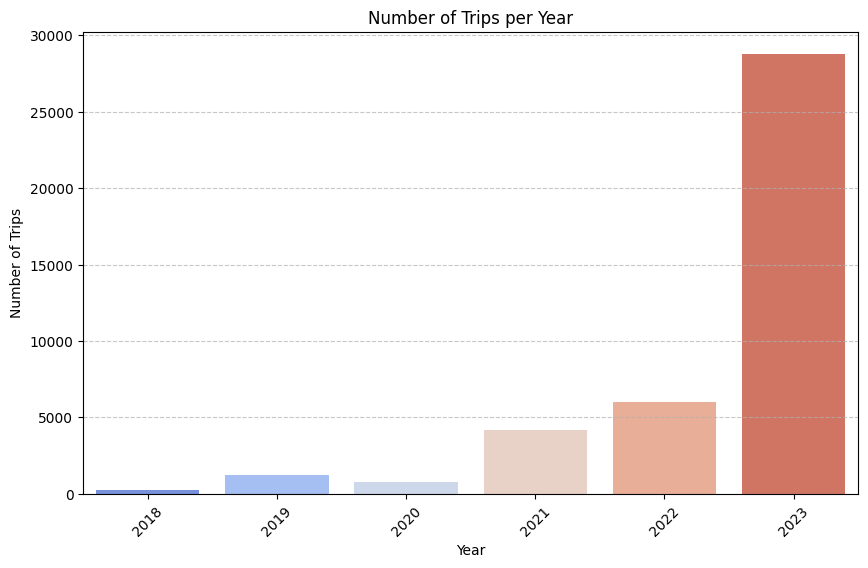

In [55]:
# Plot the number of trips per year
df['Year'] = df['firstTripDate'].dt.to_period('Y')
yearly_trip_counts = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=yearly_trip_counts.index.astype(str), y=yearly_trip_counts.values, palette='coolwarm')
plt.title('Number of Trips per Year')
plt.xlabel('Year')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [56]:
df = df[df['firstTripDate'].dt.year == 2023]

In [57]:
df['Year'].value_counts()

,count
Year,
2023,28791


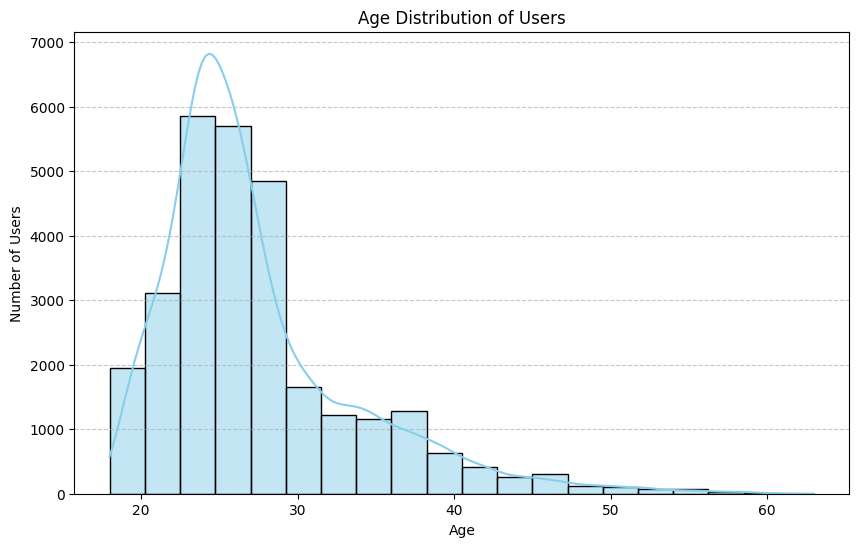

In [58]:
# Plot age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

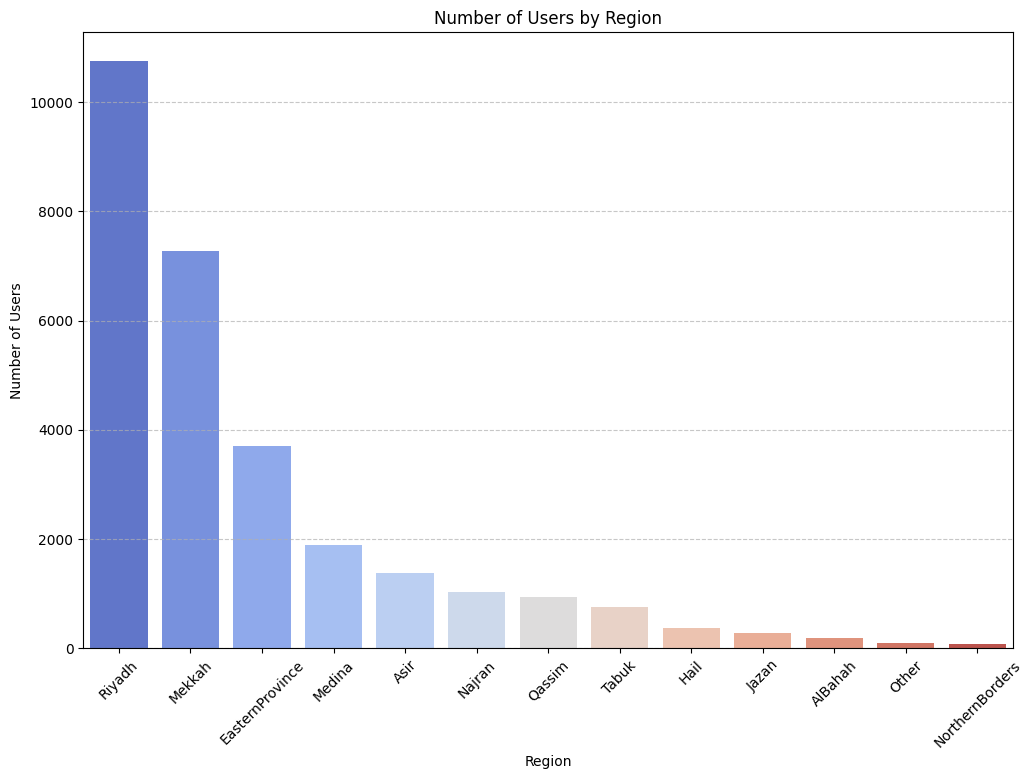

In [59]:
# bar plot for the number of users by city
region_counts = df['region'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='coolwarm', hue=region_counts.index, legend=False)
plt.title('Number of Users by Region')
plt.xlabel('Region')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

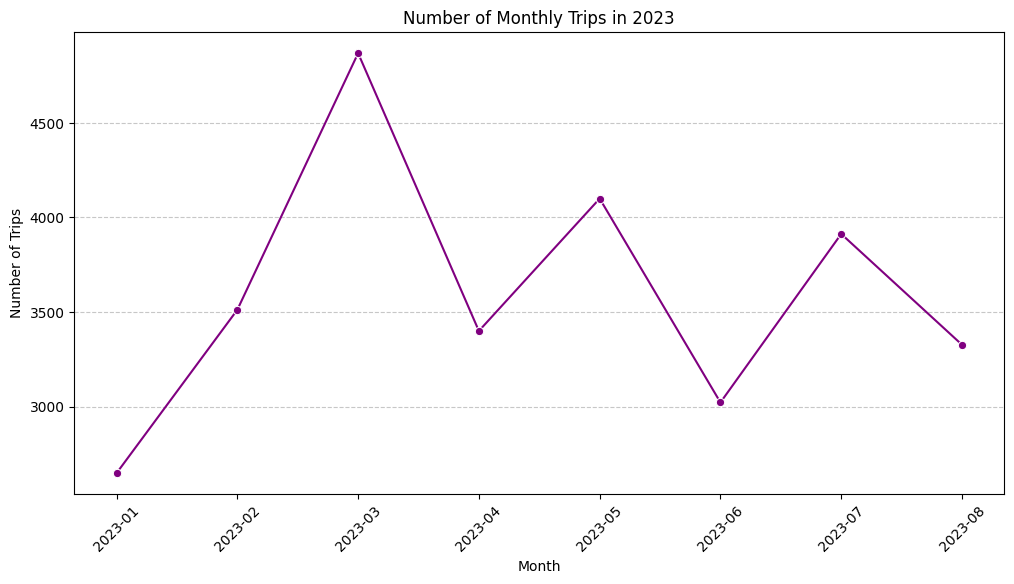

In [60]:
# Calculate the number of trips per month
df['Month'] = df['firstTripDate'].dt.to_period('M')
monthly_trips = df['Month'].value_counts().sort_index()

# line plot for the number of trips per month
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_trips.index.astype(str), y=monthly_trips.values, marker='o', color='purple')
plt.title('Number of Monthly Trips in 2023')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-64-909b2055fc92>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trips_by_day.index, y=trips_by_day.values, palette='coolwarm',)


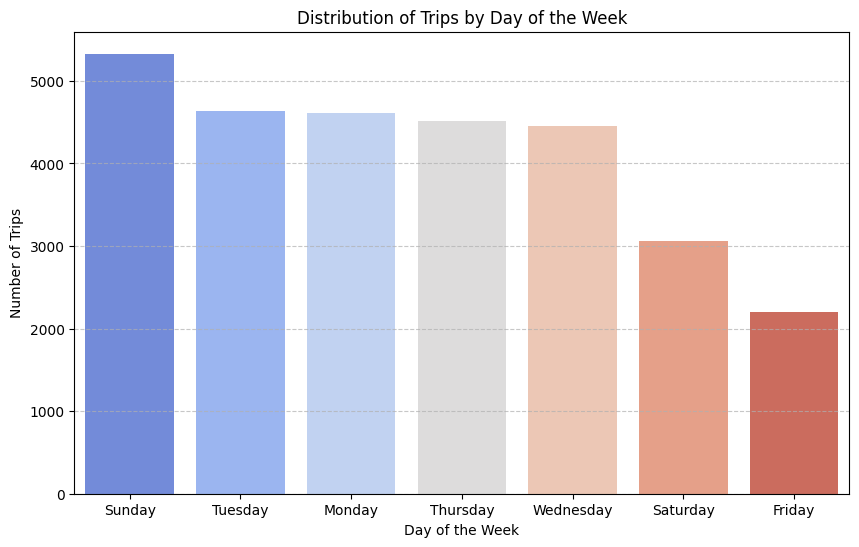

In [64]:
# Add a new column for the day of the week
df['dayOfWeek'] = df['firstTripDate'].dt.day_name()

# Bar plot for the number of trips by day of the week
trips_by_day = df['dayOfWeek'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=trips_by_day.index, y=trips_by_day.values, palette='coolwarm',)
plt.title('Distribution of Trips by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-62-041f750c2bf7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trip_by_hour.index, y=trip_by_hour.values, palette='coolwarm')


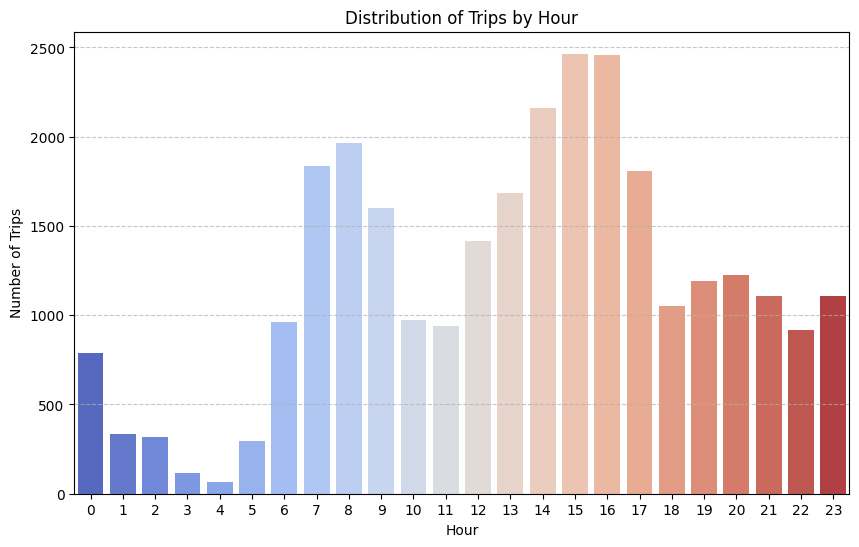

In [62]:
# Calculate the number of trips per hour
trip_by_hour = df['firstTripDate'].dt.hour.value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=trip_by_hour.index, y=trip_by_hour.values, palette='coolwarm')
plt.title('Distribution of Trips by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Insights and Conclusions

The data collected spans a period of six years, from 2018 to 2023, with the focus specifically on the year 2023. The following insights have been derived from the analysis of this data:

1. **Demographic Distribution**: The majority of users are concentrated within the age range of 20 to 30 years. This demographic represents the core user base, indicating that the initiative is particularly popular among younger adults. This age group may be more engaged with digital initiatives and potentially more mobile, which could explain their higher participation rates.

2. **Regional Usage Patterns**: The distribution of users across different regions shows significant variation:
   - **Riyadh** leads with over 10,000 users, making it the most active region for the initiative. This high number suggests that Riyadh has a robust engagement with the program, possibly due to its larger population or more extensive outreach efforts.
   - **Makkah** follows with over 7,000 users, indicating a strong regional interest but somewhat less than Riyadh. This might reflect demographic or geographical factors that influence user participation.
   - **Eastern Province** has over 3,000 users, showing a substantial but smaller user base compared to Riyadh and Makkah. This regional usage could be influenced by the population density and the extent of the initiative's reach in the area.

3. **Usage Patterns by Day of the Week**: The initiative experiences lower usage on Fridays and Saturdays. This decline is attributed to the official weekend days.

4. **Peak Usage Hours**: Analysis of daily usage patterns reveals that the initiative sees the highest engagement during specific times of the day:
   - **Morning Peak**: The period from 7:00 AM to 9:00 AM, coinciding with the start of the workday, sees a surge in activity.
   - **Afternoon Peak**: Another notable peak occurs between 1:00 PM and 3:00 PM, which aligns with the lunch break period.

These insights provide a comprehensive understanding of the usage patterns and demographic distribution of the initiative. They highlight key areas of engagement and potential opportunities for optimizing outreach and service delivery based on user habits and regional characteristics.
